# <center> Project 1: Write A Data Science Blog Post </center>
## StackOverFlow Developer Survey Dataset 

### CRISP-DM Stages:
The CRISP-DM approach will be used, to maintain track of the analytic process

<ol>
    <li>Business Understanding</li>
    <li>Data Understanding</li>
    <li>Prepare Data</li>
    <li>Data Modeling</li>
    <li>Evaluate the Result</li>
</ol>

### Business Understanding

In order to understand more about professional developers, I'll answer some questions using the 2017 StackOverFlow dataset.

Questions:
<ol>
    <li>Which countries utilized Stackoverflow the most?</li>
    <li>Stackoverflow is most used by which education level?</li>
    <li>People from which education level make more salary</li>
    <li>How many people agree and disagree on make money from StackOverFlow?</li>
    <li>Which country use stackoverflow more for money?</li> 
</ol>

####  Import packages

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

### Data Understanding

#### Read the dataset 

In [3]:
# load the dataset 
df = pd.read_csv('survey_results_public.csv')
# print first 5 rows
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# load the dataset 
df_2 = pd.read_csv('survey_results_schema.csv')
# print first 5 rows
df_2.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [5]:
df.shape

(51392, 154)

In [6]:
# print names of columns
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [7]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


### Question 1: Which countries utilized Stackoverflow the most?

#### Prepare Data

In [8]:
# check for null values
df['Country'].isnull().sum()

0

In [9]:
# display values in gender column
df.Country.unique()

array(['United States', 'United Kingdom', 'Switzerland', 'New Zealand',
       'Poland', 'Colombia', 'France', 'Canada', 'Germany', 'Greece',
       'Brazil', 'Israel', 'Italy', 'Belgium', 'India', 'Chile',
       'Croatia', 'Argentina', 'Netherlands', 'Denmark', 'Ukraine',
       'Sri Lanka', 'Malaysia', 'Finland', 'Turkey', 'Spain', 'Austria',
       'Mexico', 'Russian Federation', 'Bulgaria', 'Uruguay', 'Estonia',
       'Iran', 'Bangladesh', 'Sweden', 'Lithuania', 'Paraguay', 'Romania',
       'Costa Rica', 'Serbia', 'Slovenia', 'United Arab Emirates',
       'Tunisia', 'Kenya', 'El Salvador', 'Norway', 'Dominican Republic',
       'Belarus', 'Portugal', 'Czech Republic', 'Albania',
       'I prefer not to say', 'South Africa', 'Uzbekistan', 'Moldavia',
       'Ireland', 'Nepal', 'Pakistan', 'Slovak Republic', 'Hungary',
       'Egypt', 'Australia', 'Japan', 'South Korea', 'Rwanda',
       'Luxembourg', 'Kazakhstan', 'Bolivia', 'Vietnam', 'Somalia',
       'Saudi Arabia', 'Ethiopia

#### Data Modeling

In [34]:
# display the top 10 countries
plot_country = df['Country'].value_counts()[0:10].sort_values(ascending=False)

#### Evaluate the Results

Text(0.5, 0, 'Country')

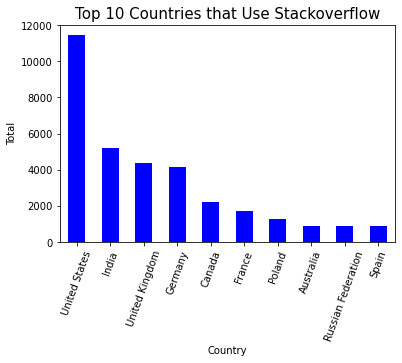

In [35]:
plot_country.plot(kind = 'bar', color = 'blue')
df['Country'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar', color = 'blue')
plt.ylabel('Total')
plt.xticks(rotation=70) 
plt.title('Top 10 Countries that Use Stackoverflow', size=15)
plt.xlabel('Country')

### Question 2: Stackoverflow is most used by which education level?

#### Prepare Data

In [13]:
# check for null values
df['HighestEducationParents'].isnull().sum()

16454

In [14]:
# display values in HighestEducationParents column
df.HighestEducationParents.unique()

array(['High school', "A master's degree", 'A professional degree',
       'A doctoral degree', nan, "A bachelor's degree",
       "Some college/university study, no bachelor's degree",
       'I prefer not to answer', 'Primary/elementary school',
       "I don't know/not sure", 'No education'], dtype=object)

In [15]:
#Drop the row if it has NaN 
new_df1 = df.dropna(axis=0, subset=["HighestEducationParents"])

In [16]:
# check again for null values
new_df1['HighestEducationParents'].isnull().sum()

0

In [17]:
# delete unnecessary values in HighestEducationParents
values = ["I don't know/not sure", 'I prefer not to answer']

#drop rows that contain any value in the list
df2 = new_df1[new_df1.HighestEducationParents.isin(values) == False]

In [18]:
# display values in HighestEducationParents column
df2.HighestEducationParents.unique()

array(['High school', "A master's degree", 'A professional degree',
       'A doctoral degree', "A bachelor's degree",
       "Some college/university study, no bachelor's degree",
       'Primary/elementary school', 'No education'], dtype=object)

#### Data Modeling

In [30]:
plot_education = df2['HighestEducationParents'].value_counts()[0:10].sort_values(ascending=False)

#### Evaluate the Results

Text(0.5, 0, 'Total Number of Users')

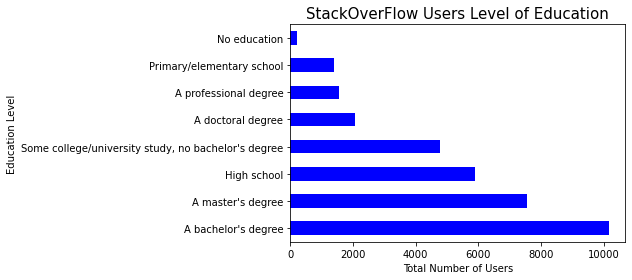

In [31]:
plot_education.plot(kind = 'barh', color = 'blue')
df2['HighestEducationParents'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'barh', color = 'blue')
plt.ylabel('Education Level')
plt.title('StackOverFlow Users Level of Education', size=15)
plt.xlabel('Total Number of Users')

In [61]:
# the salary that people make
salary_df = df2.groupby(['HighestEducationParents'])['Salary'].mean().sort_values(ascending = False)

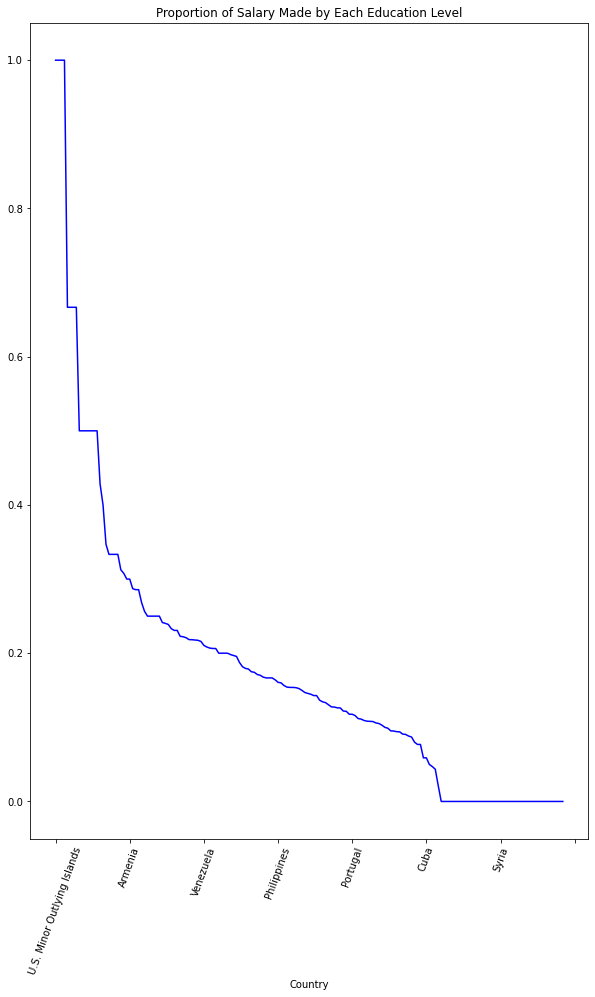

In [62]:
plt.figure(figsize=[10,15])
country_df.plot(y=salary_df.index, x=salary_df, color = 'blue')
plt.xticks(rotation=70) 
plt.title("Proportion of Salary Made by Each Education Level");

### Question 3: How many people agree and disagree on make money from StackOverFlow?

#### Prepare Data

In [21]:
# check for null values
df['StackOverflowMakeMoney'].isnull().sum()

20330

In [22]:
# display values in StackOverflowMakeMoney column
df.StackOverflowMakeMoney.unique()

array(['Strongly disagree', 'Disagree', nan, 'Somewhat agree', 'Agree',
       'Strongly agree'], dtype=object)

In [23]:
#Drop the row if it has NaN 
df_money = df.dropna(axis=0, subset=["StackOverflowMakeMoney"])

In [24]:
# check again for null values
df_money['StackOverflowMakeMoney'].isnull().sum()

0

In [25]:
# display values in StackOverflowMakeMoney column
df_money.StackOverflowMakeMoney.unique()

array(['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree',
       'Strongly agree'], dtype=object)

#### Data Modeling

In [32]:
plot_money = df_money['StackOverflowMakeMoney'].value_counts()[0:5].sort_values(ascending=False)

#### Evaluate the Results

Text(0.5, 0, 'Number of People')

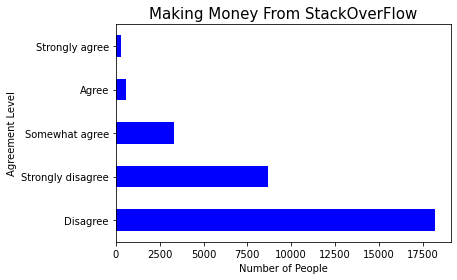

In [33]:
plot_money.plot(kind = 'barh', color = 'blue')
df2['StackOverflowMakeMoney'].value_counts()[0:5].sort_values(ascending=False).plot(kind = 'barh', color = 'blue')
plt.ylabel('Agreement Level')
plt.title('Making Money From StackOverFlow', size=15)
plt.xlabel('Number of People')

In [38]:
# add a new column to indicate whcih country use stackoverflow more to make money
df_money['useformoney'] =  df_money['StackOverflowMakeMoney'].isin (['Strongly agree',"Agree","Somewhat agree"])

<ipython-input-38-fd0116a9e8f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_money['useformoney'] =  df_money['StackOverflowMakeMoney'].isin (['Strongly agree',"Agree","Somewhat agree"])


In [39]:
# the proporition of people use stackoverflow for money by country
country_df = df_money.groupby(['Country'])['useformoney'].mean().sort_values(ascending = False)

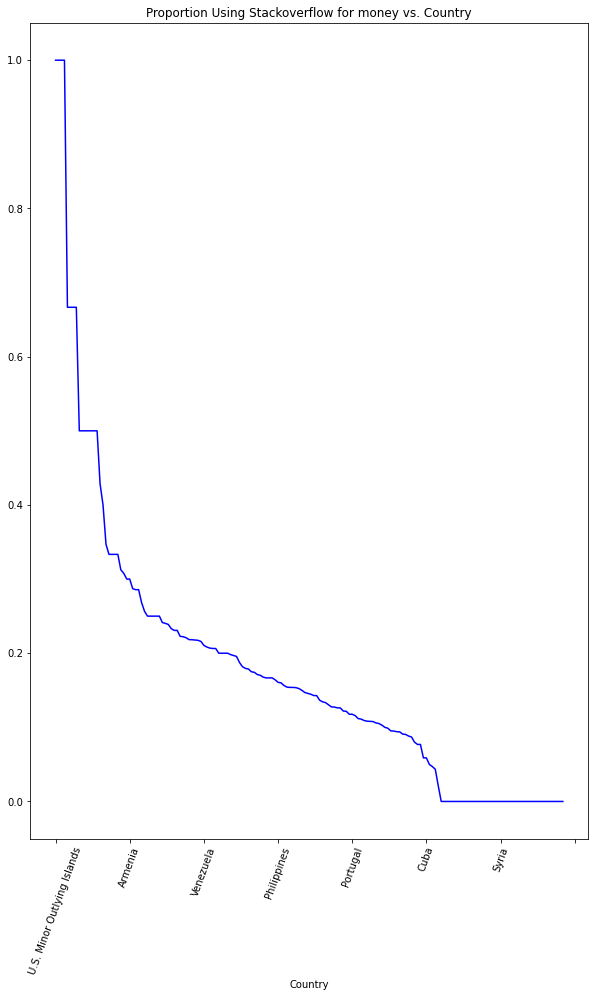

In [45]:
plt.figure(figsize=[10,15])
country_df.plot(y=country_df.index, x=country_df, color = 'blue')
plt.xticks(rotation=70) 
plt.title("Proportion Using Stackoverflow for money vs. Country");

## Conclusion:
<ul>
    <li>People in United States used Stackoverflow more than other countries</li>
    <li>There are only few people use stackoverflow in Spain, Russian Federation, and Australia</li>
    <li>people with bachelor's degree use stackoverflow more than others</li>
    <li>People with no education don't use stackoverflow that much</li>
    <li>Stackoverflow is also used by primary and elementary school students</li>
    <li>Most people don't make money from stackoverflow</li>
    <li>There are only few people make money from stackoverflow</li>
    <li>People in Unaited Satates make more salary</li>
    <li>People in United Satates use stackoverflow for money more than other countries</li>
</ul>